## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
# from google.colab import drive
# drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = r'Dataset/train'
val =   r'Dataset/val'
test =  r'Dataset/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential()

# 1: +Convolutional
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu')) #150*150 rgb
# model.add(Activation('relu'))
# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(Activation('relu'))
# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64, activation='relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1, activation='sigmoid')) # Softmax is used for more than 2 output classes


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history_cnn = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/2028992165.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = model.fit_generator(
2022-02-25 19:31:18.011467: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
312/312 [==============================] - 81s 258ms/step - loss: 0.6263 - accuracy: 0.6385 - val_loss: 0.5232 - val_accuracy: 0.7570
Epoch 2/10
312/312 [==============================] - 88s 281ms/step - loss: 0.5154 - accuracy: 0.7501 - val_loss: 0.4533 - val_accuracy: 0.7743
Epoch 3/10
312/312 [==============================] - 90s 289ms/step - loss: 0.4484 - accuracy: 0.7947 - val_loss: 0.4498 - val_accuracy: 0.7915
Epoch 4/10
312/312 [==============================] - 83s 266ms/step - loss: 0.3939 - accuracy: 0.8272 - val_loss: 0.3932 - val_accuracy: 0.8207
Epoch 5/10
312/312 [==============================] - 83s 267ms/step - loss: 0.3514 - accuracy: 0.8495 - val_loss: 0.3674 - val_accuracy: 0.8335
Epoch 6/10
312/312 [==============================] - 84s 269ms/step - loss: 0.3104 - accuracy: 0.8666 - val_loss: 0.3651 - val_accuracy: 0.8384
Epoch 7/10
312/312 [==============================] - 85s 271ms/step - loss: 0.2759 - accuracy: 0.8836 - val_loss: 0.3715 - val_ac

In [8]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data for 10 epoches : %.2f%%" % (scores[1]*100))

/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/2710062828.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data for 10 epoches : 85.02%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [9]:
def print_accur_loss(model_history):
  # summarize history for loss
  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['loss'])
  # plt.xlim(0,9)
  plt.grid()
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['accuracy', 'loss'], loc='best')
  plt.show()


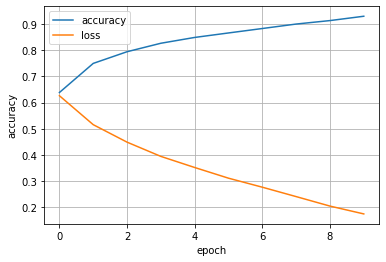

In [10]:

# summarize history for loss
print_accur_loss(history_cnn) # Take the last

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [11]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [12]:
# add layers to VGG16:

model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)
# + flattening
model_vgg16.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_vgg16.add(Dense(256, activation="relu"))
# + ReLu
# + Dropout
model_vgg16.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_vgg16.add(Dense(1,activation="sigmoid"))
# + sigmoid
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


E.g., it was like:


In [14]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model_VGG16_hist = model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/781870829.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_VGG16_hist = model_vgg16.fit_generator(


312/312 [==============================] - 1252s 4s/step - loss: 0.4972 - accuracy: 0.7516 - val_loss: 0.3484 - val_accuracy: 0.8651
Epoch 2/5
312/312 [==============================] - 1288s 4s/step - loss: 0.3402 - accuracy: 0.8549 - val_loss: 0.2944 - val_accuracy: 0.8865
Epoch 3/5
312/312 [==============================] - 1290s 4s/step - loss: 0.2997 - accuracy: 0.8725 - val_loss: 0.2702 - val_accuracy: 0.8960
Epoch 4/5
312/312 [==============================] - 1308s 4s/step - loss: 0.2745 - accuracy: 0.8843 - val_loss: 0.2571 - val_accuracy: 0.9009
Epoch 5/5
312/312 [==============================] - 1317s 4s/step - loss: 0.2599 - accuracy: 0.8920 - val_loss: 0.2451 - val_accuracy: 0.9034


In [15]:
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/744118947.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 88.90%


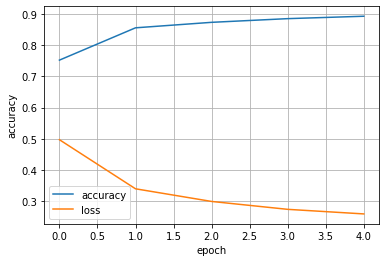

In [16]:
print_accur_loss(model_VGG16_hist)

# Other Models

In [17]:
resnet_net = ResNet50(weights='imagenet', 
                  include_top=False,     
                  input_shape=(150, 150, 3))
resnet_net.trainable = False              
resnet_net.summary()  

94781440/94765736 [==============================] - 9s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [18]:
# add layers to ResNet50:

model_resnet = Sequential()
model_resnet.add(resnet_net)
# + flattening
model_resnet.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_resnet.add(Dense(256, activation="relu"))
# + ReLu
# + Dropout
model_resnet.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_resnet.add(Dense(1,activation="sigmoid"))
# + sigmoid
model_resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36,695,425
Trainable params: 13,107,713
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
model_resnet.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [20]:
model_ResNet_hist = model_resnet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5


/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/3064220928.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_ResNet_hist = model_resnet.fit_generator(


312/312 [==============================] - 472s 2s/step - loss: 0.6868 - accuracy: 0.5698 - val_loss: 0.6458 - val_accuracy: 0.6382
Epoch 2/5
312/312 [==============================] - 483s 2s/step - loss: 0.6478 - accuracy: 0.6240 - val_loss: 0.6298 - val_accuracy: 0.6641
Epoch 3/5
312/312 [==============================] - 488s 2s/step - loss: 0.6340 - accuracy: 0.6404 - val_loss: 0.6212 - val_accuracy: 0.6530
Epoch 4/5
312/312 [==============================] - 537s 2s/step - loss: 0.6208 - accuracy: 0.6597 - val_loss: 0.6062 - val_accuracy: 0.6867
Epoch 5/5
312/312 [==============================] - 540s 2s/step - loss: 0.6133 - accuracy: 0.6666 - val_loss: 0.6016 - val_accuracy: 0.6846


In [21]:
scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/1x/1zh1gh3s0gn4wj0d3z8q2x4m0000gn/T/ipykernel_1657/68345648.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 68.35%


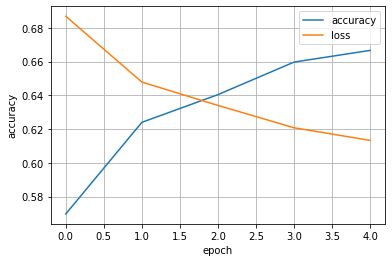

In [22]:
print_accur_loss(model_ResNet_hist)

In [23]:
def make_prediction_by_img(img_path, model):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (150, 150))
    image = np.array(image).reshape((1, 150, 150, 3))

    result = model.predict(image)
    if result.astype(int).item() == 0:
        print("Cat image")
    elif result.astype(int).item() == 1:
        print("Dog image")

In [25]:
def show(img_path):
  img = mpimg.imread(img_path)
  plt.figure(figsize = (10,10))
  plt.imshow(img)
  plt.show()

Thats my own dog (named Hiro/Hirohito)

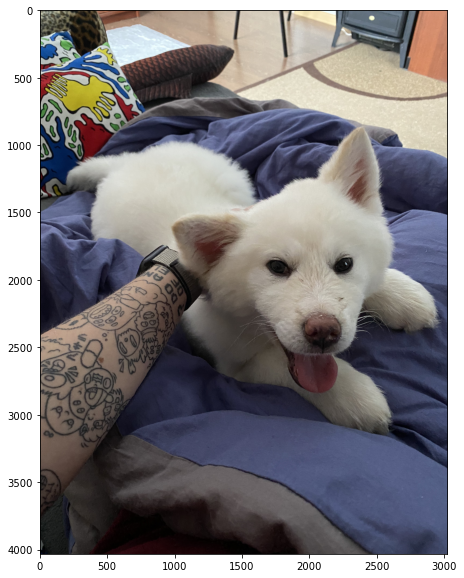

Dog image
Cat image


In [28]:
img = 'IMG_1857.jpeg'
show(img)
make_prediction_by_img(img, model_vgg16)
make_prediction_by_img(img, model_resnet)

Resnet hadn't work correctly as You can see (acc 67%), but VGG16 was right